In [ ]:
from pysarflow import Sentinel1GRDProcessor
import matplotlib.pyplot as plt

In [2]:
# Defining area of interest in geojson format
aoi_polygon = {"type":"Polygon",
               "coordinates":[[
                   [-118.185081,34.137719],
                   [-118.185081,34.266631],
                   [-117.983208,34.266631],
                   [-117.983208,34.137719],
                   [-118.185081,34.137719]]]}

# Creating processor instance from Sentinel1GRDProcessor class
processor = Sentinel1GRDProcessor()

# Running search data function using processor instance
processor.search_data(aoi=aoi_polygon, datetime = "2025-01-05/2025-01-10")

/Users/rabinatwayana/Rabina/CDE II/software_development/py_sar_flow/.venv/lib/python3.12/site-packages/pystac_client/item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


In [3]:
import os
os.chdir("/Users/rabinatwayana/Rabina/CDE II/software_development/py_sar_flow/")
!pwd

/Users/rabinatwayana/Rabina/CDE II/software_development/py_sar_flow


In [4]:
processor = Sentinel1GRDProcessor()
# Testing read_grd_data 
# safe_path = r'C:\Users\Ethel Ogallo\Documents\CDE\PLUS\SS25\practice_softwaredev\pysarflow\docs\ethel_temp\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.zip'
# if reading zip file
zip_safe_path = "docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE.zip"
safe_extract_path= "docs/data/"
ds = processor.read_grd_data(zip_safe_path,safe_extract_path)

# #if reading safe file directly
# safe_folder = "docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE"
# ds = processor.read_grd_data(zip_safe_path)

print(ds)

Extracting zip file: docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE.zip
Loading band VV from docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE/measurement/s1a-iw-grd-vv-20241209t015852-20241209t015917-056909-06fd49-001.tiff
Loading band VH from docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE/measurement/s1a-iw-grd-vh-20241209t015852-20241209t015917-056909-06fd49-002.tiff
Data loaded successfully
<xarray.Dataset> Size: 2GB
Dimensions:      (y: 16676, x: 26309, time: 1)
Coordinates:
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 8B 2024-12-09T01:58:52.968127
Dimensions without coordinates: y, x
Data variables:
    VV           (y, x) uint16 877MB ...
    VH           (y, x) uint16 877MB ...
Attributes:
    startTime:  2024-12-09T01:58:52.968127


In [5]:
# test apply precise orbit files
safe_folder = "docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE"
orbit_extract_folder = "docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE"
ds_with_orbit = processor.apply_orbit_file(ds, safe_folder, orbit_extract_folder, overwrite=False)

print(ds_with_orbit)

Updated orbitList in docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE/annotation/s1a-iw-grd-vh-20241209t015852-20241209t015917-056909-06fd49-002_updated_updated.xml
Updated orbitList in docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE/annotation/s1a-iw-grd-vh-20241209t015852-20241209t015917-056909-06fd49-002_updated.xml
Updated orbitList in docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE/annotation/s1a-iw-grd-vv-20241209t015852-20241209t015917-056909-06fd49-001_updated.xml
Updated orbitList in docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE/annotation/s1a-iw-grd-vv-20241209t015852-20241209t015917-056909-06fd49-001_updated_updated.xml
<xarray.Dataset> Size: 2GB
Dimensions:      (y: 16676, x: 26309, time: 1)
Coordinates:
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 8B 2024-12-09T01:58:52.968127
    sat_pos_x    (time) float64 8B -

In [6]:
# Calling function for parsing thermal noise removal Lookup Table (LUT)
# thermal_lut_ds=processor.parse_thermal_noise_removal_lut(safe_folder)

# Calling function to remove thermal noise from the datasets
thermal_noise_corrected_ds = processor.remove_thermal_noise(safe_folder, ds)

Reading xml for VH band
Reading xml for VV band
Thermal noise removal LUT created successfully
Thermal noise removed successfully


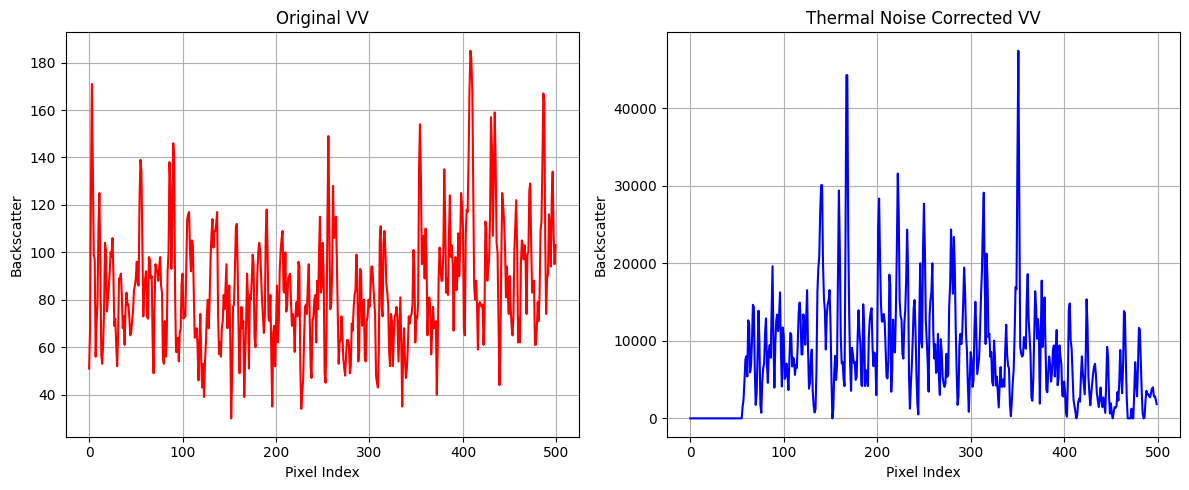

In [ ]:
# Only extracting line 5000 and plotting 500 values 
original_vv = ds['VV'].isel(x=5000).values.flatten()[:500]
corrected_vv = thermal_noise_corrected_ds['VV'].isel(line=5000).values.flatten()[:500]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original
axs[0].plot(original_vv, color='red')
axs[0].set_title("Original VV")
axs[0].set_xlabel("Pixel Index")
axs[0].set_ylabel("Backscatter")
axs[0].grid(True)

# Plot corrected
axs[1].plot(corrected_vv, color='blue')
axs[1].set_title("Thermal Noise Corrected VV")
axs[1].set_xlabel("Pixel Index")
axs[1].set_ylabel("Backscatter")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Calling function for parsing radiometric calibration LUT
# sigma_nought_lut=parse_radiometric_calibration_lut(safe_folder, "sigmaNought")

# Calling function to apply radiometric calibration in dataset and this method must be applied after applying thermal noise removal
radiometric_calibrated_ds=processor.radiometric_calibration(safe_folder,thermal_noise_corrected_ds,"sigmaNought")

Reading calibration for VV band
Reading calibration for VH band
Radiometric calibration LUT created successfully
Radiometric calibration completed successfully


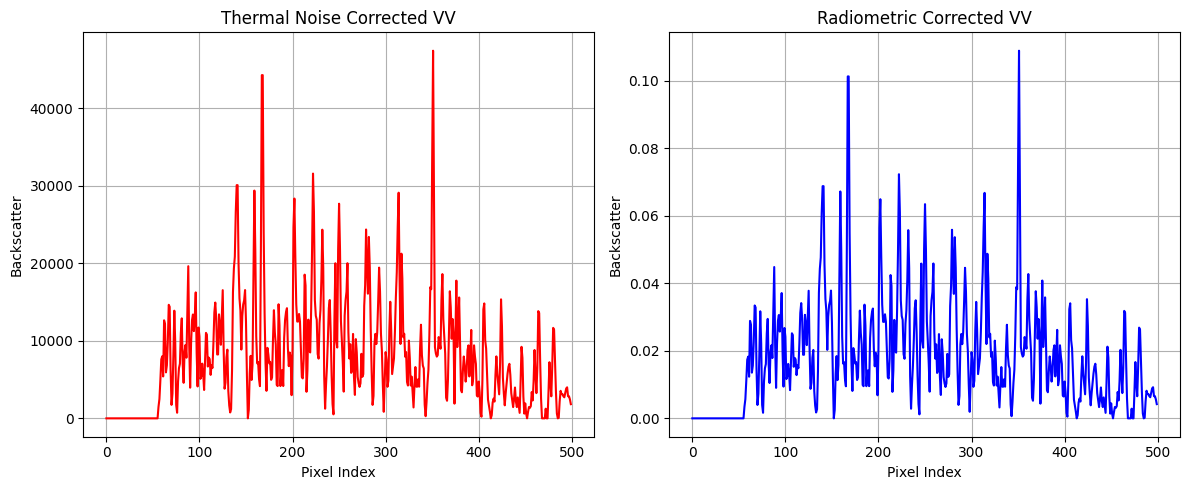

In [ ]:
# similarly plotting result after radiometric calibration 
# Flatten data
original_vv = thermal_noise_corrected_ds['VV'].isel(line=5000).values.flatten()[:500]
corrected_vv = radiometric_calibrated_ds['VV'].isel(line=5000).values.flatten()[:500]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original
axs[0].plot(original_vv, color='red')
axs[0].set_title("Thermal Noise Corrected VV")
axs[0].set_xlabel("Pixel Index")
axs[0].set_ylabel("Backscatter")
axs[0].grid(True)

# Plot corrected
axs[1].plot(corrected_vv, color='blue')
axs[1].set_title("Radiometric Corrected VV")
axs[1].set_xlabel("Pixel Index")
axs[1].set_ylabel("Backscatter")
axs[1].grid(True)

plt.tight_layout()
plt.show()